### Disclaimer

Distribution authorized to U.S. Government agencies and their contractors. Other requests for this document shall be referred to the MIT Lincoln Laboratory Technology Office.

This material is based upon work supported by the Under Secretary of Defense for Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions, findings, conclusions or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the Under Secretary of Defense for Research and Engineering.

© 2019 Massachusetts Institute of Technology.

The software/firmware is provided to you on an As-Is basis

Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part 252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed above. Use of this work other than as specifically authorized by the U.S. Government may violate any copyrights that exist in this work.


Notebook to control an agent through a tesse-gym environment

In [3]:
from pathlib import Path
from pynput.keyboard import Key, Listener, KeyCode
import matplotlib.pyplot as plt
from tesse.env import Env
from tesse.msgs import *

%load_ext autoreload
%autoreload 2
from tesse_gym.treasure_hunt import TreasureHunt
from tesse_gym.tesse_gym import get_network_config, NetworkConfig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### launch environment

In [52]:
scene_id           = 1
n_targets          = 10
max_steps          = 300
step_rate          = 20
continuous_control = True
lauch_tesse        = False
# point image and metadata ports to ROS interface
network_config     = NetworkConfig(metadata_port=9007, image_port=9008)

In [53]:
# hack to advance game clock to get initial data published 
Env(metadata_port=9007, image_port=9008).send(StepWithTransform(0, 0, 0))  
env = TreasureHunt(filename='',  # don't need a filename 
                   network_config=network_config,
                   n_targets=n_targets,
                   max_steps=max_steps,
                   step_rate=step_rate,
                   continuous_control=continuous_control,
                   launch_tesse=lauch_tesse)

### Control agent
Run this cell to use keyboard control with commands 

- i      : Forward
- l      : Turn left
- j      : Turn right
- escape /q: quit

In [ ]:
def on_press(key):
    if key == KeyCode.from_char('i'):
        obs, _, _, _ = env.step(0)
    elif key == KeyCode.from_char('l'):
        obs, _, _, _ = env.step(1)
    elif key == KeyCode.from_char('j'):
        obs, _, _, _ = env.step(2)
        
def on_release(key):
    if key == Key.esc or key == KeyCode.from_char('q'):
        return False
    
with Listener(on_press=on_press, on_release=on_release) as listener:
    listener.join()

### Plot observation

In [23]:
obs, reward, episode_done, info = env.step(1)

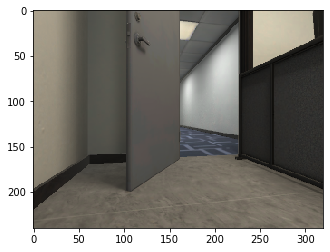

In [24]:
fig, ax = plt.subplots()

ax.imshow(obs)